<p align="center">
Universidade Federal de Alagoas</br>

Instituto de Computação</br>

</p>

# Trabalho Prático AB2

Disciplina: Sistemas Distribuídos

Semestre letivo: 2019.1

Professor: André Lage Freitas

## Especificação

**Importante**. Leia atentamente essa seção pois só serão aceitos trabalhos que obedecerem as a especificações a seguir. 

Baseado(a) no exemplo a seguir de implementação do B-multicast em Julia, façam os exercícios descritos nesse documento.

In [1]:
using Pkg
Pkg.add("Distributed")
Pkg.add("Plots")
Pkg.add("StatsPlots")

  Updating registry at `C:\Users\Wagner\.julia\registries\General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %64.4 % Resolving package versions...
  Updating `C:\Users\Wagner\.julia\environments\v1.1\Project.toml`
 [no changes]
  Updating `C:\Users\Wagner\.julia\environments\v1.1\Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `C:\Users\Wagner\.julia\environments\v1.1\Project.toml`
 [no changes]
  Updating `C:\Users\Wagner\.julia\environments\v1.1\Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `C:\Users\Wagner\.julia\environments\v1.1\Project.toml`
 [no changes]
  Updating `C:\Users\Wagner\.julia\environments\v1.1\Manifest.toml`
 [no changes]


In [2]:
using Distributed

In [3]:
function B_multicast(g,m,B_deliver)
    for p in g
        remotecall(p, B_deliver, m)
    end
end

# Adding 3 processes (workers)
# addprocs(3)

# My group is composed by all workers
g = workers()

# Multicasting "oi!" message to group `g` by assuming `println` as B_deliver function.
B_multicast(g,"oi!",println)

MethodError: MethodError: no method matching remotecall(::Int64, ::typeof(println), ::String)
Closest candidates are:
  remotecall(::Any, !Matched::Distributed.LocalProcess, ::Any...; kwargs...) at C:\cygwin\home\Administrator\buildbot\worker\package_win64\build\usr\share\julia\stdlib\v1.1\Distributed\src\remotecall.jl:343
  remotecall(::Any, !Matched::Distributed.Worker, ::Any...; kwargs...) at C:\cygwin\home\Administrator\buildbot\worker\package_win64\build\usr\share\julia\stdlib\v1.1\Distributed\src\remotecall.jl:349
  remotecall(::Any, !Matched::Integer, ::Any...; kwargs...) at C:\cygwin\home\Administrator\buildbot\worker\package_win64\build\usr\share\julia\stdlib\v1.1\Distributed\src\remotecall.jl:361
  ...

### Suporte de programação distribuída em Julia

Para utilizar o suporte de programação distribuída em Julia, primeiro devemos carergar a biblioteca `Distributed`:

```julia
using Pkg
Pkg.add("Distributed")
using Distributed
```

A seguir, segue uma lista (não extensiva) de funções que poderão ajudar na programação distribuída para a implementação do trabalho:

```julia
addprocs
remotecall
@fetchfrom
@everywhere
sleep
@spawn
```

Para buscar uma rápida ajuda sobre as funções, utilize `?` na frente da função (ver exemplo abaixo). 

```julia
?addprocs
```

Utilize o [material do mini-curso do Professor](https://github.com/proflage/2018-julia-hands-on) para estudo e a [documentação oficial da linguagem Julia (1.x)](https://docs.julialang.org/en/v1/) para demais dúvidas.

## Exercício 1: Sincronismo (2,0 pontos)

Adicione 10 processos com o comando `addprocs` abaixo. 

_Atenção_: caso sua instalação local de Julia pode não conseguir adicionar 10 processos, use a [JuliaBox](https://juliabox.com).

In [4]:
addprocs(10)

10-element Array{Int64,1}:
  2
  3
  4
  5
  6
  7
  8
  9
 10
 11

Modifique a implementação do B-multicast para utilizar communicação síncrona.

In [5]:
function B_multicast_sync(workers, msg, func)
    for w in workers
        @sync @spawnat w func(msg)
    end
end

function B_multicast_assync(workers, msg, func)
    for w in workers
        @spawnat w func(msg)
    end
end

B_multicast_assync (generic function with 1 method)

In [6]:
g = workers()
B_multicast_sync(g, "oi!", println)

      From worker 2:	oi!
      From worker 3:	oi!
      From worker 4:	oi!
      From worker 5:	oi!
      From worker 6:	oi!
      From worker 7:	oi!
      From worker 8:	oi!
      From worker 9:	oi!
      From worker 10:	oi!
      From worker 11:	oi!


In [7]:
B_multicast_assync(g, "oi!", println)

      From worker 3:	oi!
      From worker 11:	oi!
      From worker 10:	oi!
      From worker 2:	oi!
      From worker 4:	oi!
      From worker 8:	oi!
      From worker 7:	oi!
      From worker 6:	oi!
      From worker 9:	oi!
      From worker 5:	oi!


Execute as duas versões do B-multicast (síncrona e assíncrona) e compare as saídas.

A ordem das mensagens das saídas foram as mesmas para ambas versões do B-multicast? Por quê?

**Resposta**: _Não, na forma assíncrona não se tem uma ordem padrão para a execução, enquanto que na síncrona o sistema segue a ordem de envio._

## Exercício 2: Análise de desempenho do B-multicast (2,0 pontos)

Meça o tempo de execução duas versões do B-multicast (síncrona e assíncrona). Dica: utilize a macro `@time`.

* Execute 50 vezes essa medição e construa um gráfico em forma de barras:
	* cada barra representando cada versão do B-multicast;
	* calcule e coloque no gráfico o [intervalo de confiança](https://en.wikipedia.org/wiki/Confidence_interval) com nível de 95%.

In [8]:
sync_times = []
for i in 1:50
    println(i,":")
    push!(sync_times, @elapsed B_multicast_sync(g, "oi!", println))
end

1:
      From worker 2:	oi!
      From worker 3:	oi!
      From worker 4:	oi!
      From worker 5:	oi!
      From worker 6:	oi!
      From worker 7:	oi!
      From worker 8:	oi!
      From worker 9:	oi!
      From worker 10:	oi!
      From worker 11:	oi!
2:
      From worker 2:	oi!
      From worker 3:	oi!
      From worker 4:	oi!
      From worker 5:	oi!
      From worker 6:	oi!
      From worker 7:	oi!
      From worker 8:	oi!
      From worker 9:	oi!
      From worker 10:	oi!
      From worker 11:	oi!
3:
      From worker 2:	oi!
      From worker 3:	oi!
      From worker 4:	oi!
      From worker 5:	oi!
      From worker 6:	oi!
      From worker 7:	oi!
      From worker 8:	oi!
      From worker 9:	oi!
      From worker 10:	oi!
      From worker 11:	oi!
4:
      From worker 2:	oi!
      From worker 3:	oi!
      From worker 4:	oi!
      From worker 5:	oi!
      From worker 6:	oi!
      From worker 7:	oi!
      From worker 8:	oi!
      From worker 9:	oi!
      From worker 10:	oi!
      

In [9]:
assync_times = []
for i in 1:50
    println(i,":")
    push!(assync_times, @elapsed B_multicast_assync(g, "oi!", println))
end

1:
      From worker 2:	oi!
      From worker 3:	oi!
      From worker 4:	oi!
      From worker 5:	oi!
      From worker 6:	oi!
      From worker 7:	oi!
      From worker 8:	oi!
      From worker 9:	oi!
      From worker 10:	oi!
2:
      From worker 11:	oi!
      From worker 2:	oi!
      From worker 3:	oi!
3:
      From worker 4:	oi!
      From worker 2:	oi!
      From worker 5:	oi!
      From worker 6:	oi!
      From worker 7:	oi!
      From worker 8:	oi!
      From worker 9:	oi!
      From worker 10:	oi!
      From worker 11:	oi!
      From worker 3:	oi!
      From worker 4:	oi!
4:
      From worker 5:	oi!
      From worker 6:	oi!
      From worker 7:	oi!
5:
      From worker 8:	oi!
      From worker 9:	oi!
      From worker 10:	oi!
      From worker 11:	oi!
      From worker 2:	oi!
      From worker 3:	oi!
      From worker 4:	oi!
      From worker 5:	oi!
      From worker 6:	oi!
      From worker 7:	oi!
      From worker 8:	oi!
      From worker 9:	oi!
6:
      From worker 10:	oi!


      From worker 6:	oi!
      From worker 7:	oi!
      From worker 7:	oi!
37:
      From worker 8:	oi!
      From worker 8:	oi!
      From worker 9:	oi!
      From worker 9:	oi!
38:
      From worker 10:	oi!
      From worker 10:	oi!
      From worker 11:	oi!
39:
      From worker 2:	oi!
      From worker 3:	oi!
      From worker 4:	oi!
      From worker 5:	oi!
      From worker 6:	oi!
      From worker 6:	oi!
      From worker 7:	oi!
      From worker 7:	oi!
      From worker 8:	oi!
      From worker 8:	oi!
      From worker 9:	oi!
      From worker 9:	oi!
      From worker 9:	oi!
      From worker 10:	oi!
      From worker 10:	oi!
      From worker 10:	oi!
      From worker 11:	oi!
      From worker 11:	oi!
      From worker 11:	oi!
      From worker 11:	oi!
      From worker 2:	oi!
      From worker 2:	oi!
      From worker 2:	oi!
      From worker 2:	oi!
      From worker 3:	oi!
      From worker 3:	oi!
      From worker 3:	oi!
      From worker 3:	oi!
40:
      From worker 4:	oi!

* Qual das duas versões teve o menor tempo de execução? Por quê?

**Resposta**: _A versão assíncrona teve o menor tempo de execução, isso principalmente pelo fato de que possibilita o envio de mensagens em paralelo._

**Gráfico**:   


In [10]:
using Statistics

function st(sync, assync)
    means = [mean(sync) mean(assync)]
    ci = [1.96*std(sync)/length(sync) 
        1.96*std(assync)/length(assync)]
    
    return means, ci
end

st (generic function with 1 method)

In [11]:
means, ci = st(sync_times, assync_times)

([0.0674531 0.0336822], [0.00124179, 0.000383996])

┌ Info: Recompiling stale cache file C:\Users\Wagner\.julia\compiled\v1.1\Plots\ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file C:\Users\Wagner\.julia\compiled\v1.1\StatsPlots\SiylL.ji for StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1184


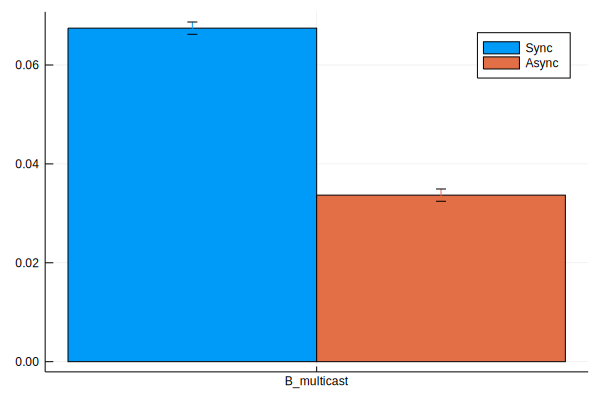

In [12]:
using Plots
using StatsPlots

groupedbar(["B_multicast"], means, yerr = ci, label=["Sync", "Async"])

## Exercício 3: Análise de desempenho do R-multicast (3,0 pontos)

Implemente duas versões do algoritmo R-multicast: uma assíncrona e outra síncrona.

* R-multicast síncrono

In [13]:
check = []

0-element Array{Any,1}

In [14]:
function B_multicast_sync(check, proc, g, message)
    if !(proc in check)
        push!(check, proc)
        remotecall_wait(println, proc, message)
        R_multicast_sync(g, message)
    end
end

function R_multicast_sync(g, message)
    for proc in g
        B_multicast_sync(check, proc, g, message)
    end
end

R_multicast_sync (generic function with 1 method)

In [15]:
sync_times = []

for i in 1:50
    println(i,":")
    push!(sync_times, @elapsed R_multicast_sync(g, "oi!"))
    check = Int[]
end

1:
      From worker 2:	oi!
      From worker 3:	oi!
      From worker 4:	oi!
      From worker 5:	oi!
      From worker 6:	oi!
      From worker 7:	oi!
      From worker 8:	oi!
      From worker 9:	oi!
      From worker 10:	oi!
      From worker 11:	oi!
2:
      From worker 2:	oi!
      From worker 3:	oi!
      From worker 4:	oi!
      From worker 5:	oi!
      From worker 6:	oi!
      From worker 7:	oi!
      From worker 8:	oi!
      From worker 9:	oi!
      From worker 10:	oi!
      From worker 11:	oi!
3:
      From worker 2:	oi!
      From worker 3:	oi!
      From worker 4:	oi!
      From worker 5:	oi!
      From worker 6:	oi!
      From worker 7:	oi!
      From worker 8:	oi!
      From worker 9:	oi!
      From worker 10:	oi!
      From worker 11:	oi!
4:
      From worker 2:	oi!
      From worker 3:	oi!
      From worker 4:	oi!
      From worker 5:	oi!
      From worker 6:	oi!
      From worker 7:	oi!
      From worker 8:	oi!
      From worker 9:	oi!
      From worker 10:	oi!
      

      From worker 2:	oi!
      From worker 3:	oi!
      From worker 4:	oi!
      From worker 5:	oi!
      From worker 6:	oi!
      From worker 7:	oi!
      From worker 8:	oi!
      From worker 9:	oi!
      From worker 10:	oi!
      From worker 11:	oi!
35:
      From worker 2:	oi!
      From worker 3:	oi!
      From worker 4:	oi!
      From worker 5:	oi!
      From worker 6:	oi!
      From worker 7:	oi!
      From worker 8:	oi!
      From worker 9:	oi!
      From worker 10:	oi!
      From worker 11:	oi!
36:
      From worker 2:	oi!
      From worker 3:	oi!
      From worker 4:	oi!
      From worker 5:	oi!
      From worker 6:	oi!
      From worker 7:	oi!
      From worker 8:	oi!
      From worker 9:	oi!
      From worker 10:	oi!
      From worker 11:	oi!
37:
      From worker 2:	oi!
      From worker 3:	oi!
      From worker 4:	oi!
      From worker 5:	oi!
      From worker 6:	oi!
      From worker 7:	oi!
      From worker 8:	oi!
      From worker 9:	oi!
      From worker 10:	oi!
      

* R-multicast assíncrono

In [16]:
function B_multicast_assync_check(check, proc, g, message)
    if !(proc in check)
        push!(check, proc)
        remotecall(println, proc, message)
        R_multicast_assync(g, message)
    end
end

function R_multicast_assync(g, message)
    for proc in g
        B_multicast_assync_check(check, proc, g, message)
    end
end

R_multicast_assync (generic function with 1 method)

In [17]:
assync_times = []

for i in 1:50
    println(i,":")
    push!(assync_times, @elapsed R_multicast_assync(g, "oi!"))
    check = Int[]
end

1:
      From worker 2:	oi!
      From worker 3:	oi!
      From worker 4:	oi!
2:
      From worker 5:	oi!
      From worker 7:	oi!
      From worker 8:	oi!
      From worker 6:	oi!
3:
      From worker 2:	oi!
      From worker 3:	oi!
      From worker 4:	oi!
      From worker 5:	oi!
      From worker 7:	oi!
      From worker 8:	oi!
      From worker 6:	oi!
4:
      From worker 2:	oi!
      From worker 3:	oi!
      From worker 4:	oi!
      From worker 5:	oi!
      From worker 7:	oi!
      From worker 8:	oi!
      From worker 6:	oi!
5:
      From worker 2:	oi!
      From worker 3:	oi!
      From worker 4:	oi!
      From worker 5:	oi!
      From worker 7:	oi!
      From worker 8:	oi!
      From worker 6:	oi!
6:
      From worker 2:	oi!
      From worker 3:	oi!
7:
      From worker 4:	oi!
      From worker 5:	oi!
      From worker 7:	oi!
      From worker 8:	oi!
      From worker 6:	oi!
      From worker 9:	oi!
      From worker 11:	oi!
      From worker 11:	oi!
      From worker 11:	oi!
 

      From worker 5:	oi!
      From worker 5:	oi!
35:
      From worker 4:	oi!
      From worker 4:	oi!
      From worker 6:	oi!
      From worker 6:	oi!
36:
      From worker 9:	oi!
      From worker 9:	oi!
      From worker 7:	oi!
      From worker 7:	oi!
37:
      From worker 2:	oi!
      From worker 2:	oi!
      From worker 8:	oi!
      From worker 8:	oi!
38:
      From worker 3:	oi!
      From worker 3:	oi!
      From worker 10:	oi!
      From worker 10:	oi!
39:
      From worker 11:	oi!
      From worker 5:	oi!
      From worker 4:	oi!
40:
      From worker 6:	oi!
      From worker 9:	oi!
      From worker 9:	oi!
41:
      From worker 7:	oi!
      From worker 7:	oi!
      From worker 2:	oi!
      From worker 2:	oi!
      From worker 2:	oi!
42:
      From worker 8:	oi!
      From worker 8:	oi!
      From worker 8:	oi!
      From worker 3:	oi!
      From worker 3:	oi!
      From worker 3:	oi!
      From worker 3:	oi!
      From worker 10:	oi!
      From worker 10:	oi!
      From wo

Faça a mesma análise de desempenho para o R-multicast que você fez no Exercício 2.

    
* Qual das duas versões (R-multicast assíncrono e assíncrono) teve o menor tempo de execução? Por quê?

**Resposta**: _De forma semelhante ao que aconteceu no exercício anterior, a forma assíncrona leva menos tempo para ser executada. Como para manter a confiabilidade do algoritmo se faz necessário um maior envio de mensagens comparado à abordagem anterior, a diferença de tempo entre o envio síncrono e assíncrono aumenta._

**Gráfico**: 

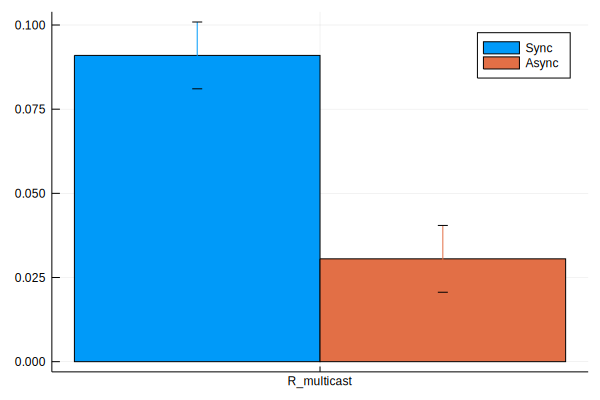

In [18]:
means, ci = st(sync_times, assync_times)
groupedbar(["R_multicast"], means, yerr = ci, label=["Sync", "Async"])


    



## Exercício 4: Análise de desempenho: B-multicast vs. R-multicast (3,0 pontos)

Para cada uma das comparações abaixo, qual dos algoritmos teve o menor tempo de execução? Por quê?

* B-multicast assíncrono vs. R-multicast assíncrono.
    

**Resposta**: _B-multicast assíncrono. Já que não precisa enviar mais mensagens para garantir a confiabilidade._    
    
* B-multicast síncrono vs. R-multicast síncrono.


**Resposta**: _B-multicast síncrono. De maneira análoga, o algoritmo não precisa enviar mais mensagens do que o necessário para a comunicação, embora ignorando a confiabilidade._

## Entrega

As respostas deverão ser entregues na parte indicada desse arquivo reservada ao código fonte, no formato [IJulia Notebook](https://github.com/JuliaLang/IJulia.jl), que utiliza tecnologia [Jupyter](https://www.jupyter.org).

O programa deve ser implementado na linguagem de programação [**Julia** versão 1.x](https://julialang.org/downloads/). Seu trabalho será testado na [JuliaBox](https://juliabox.com). 

Baixe seu arquivo `.ipynb` e anexe-o ao Google Classroom. Não se esqueça de **testar seu arquivo `.ipynb` na JuliaBox** antes de enviá-lo.


As respostas deverão ser entregues nos devidos campos desse arquivo, ou seja, em [Markdown](https://en.wikipedia.org/wiki/Markdown) e no formato [IJulia Notebook](https://github.com/JuliaLang/IJulia.jl).

O programa deve ser implementado na linguagem de programação **Julia**. Seu trabalho será testado na [JuliaBox](https://juliabox.com), portanto teste seu arquivo IJulia na JulizBox antes de enviá-lo.


### Forma 

O arquivo IJulia Notebook deverá ser entregue ao Professor **exclusivamente através do Google Classroom**.



A responsabilidade sobre a integridade do arquivo contendo trabalho é exclusivamente dos discentes. Serão ignorados os trabalhos cujos arquivos não conseguirem ser abertos pelo Professor.

### Prazos

O prazo de entrega sem atraso é o dia **18/11/17**.

Trabalhos entregues com atraso serão aceitos, no máximo, até o o dia **19/11/17**. Serão descontados 5% da nota obtida por dia de atraso.


## Pontuação extra

O(a) discente que realizar mais tarefas, além do que foi especificado neste trabalho, o professor atribuirá de 0,5 a 1,0 ponto extra a depender da relevância da contribuição no programa. O critério será decidido pelo professor. 

O(a) discente deve indicar qual é a tarefa executada. Por exemplo, adição de funcionalidades, armazenamento de dados em arquivo, documentação de código, comentários em inglês sem erros ortográficos, etc.


**Plágio** A nota zero será atribuída caso haja qualquer tipo de cópia parcial ou integral assim como as devidas medidas legais. Leia a [cartilha sobre plágio](http://www.noticias.uff.br/arquivos/cartilha-sobre-plagio-academico.pdf).

## Disclaimer

Esse material foi elaborado pelo [Prof. André Lage Freitas](https://sites.google.com/a/ic.ufal.br/andrelage/) e está licenciado sob a licença _GNU General Public License v3.0_.